In [1]:
import numpy as np
import tensorflow as tf
from ipynb.fs.full.parse import Crawler
import sys
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

TEST_SIZE = 231
FEATURES = 24
OUTPUTS = 1

if __name__ == "__main__":
    n_input = 24 # MNIST data input (img shape: 28*28)
    n_treatments = 1 # MNIST total classes (0-9 digits)
    tf.compat.v1.disable_eager_execution()
    x = tf.compat.v1.placeholder("float", [None, n_input])
    y = tf.compat.v1.placeholder("float", [None, n_treatments])

In [2]:
    objCrawler = Crawler("FinalCancer_Data.csv")
    data = objCrawler.p_input()

In [3]:
    max0 = np.amax(data[:, np.r_[0]])
    max1 = np.amax(data[:, np.r_[1]])
    max5 = np.amax(data[:, np.r_[5]])
    max6 = np.amax(data[:, np.r_[6]])
    max7 = np.amax(data[:, np.r_[7]])
    max8 = np.amax(data[:, np.r_[8]])
    max9 = np.amax(data[:, np.r_[9]])
    max10 = np.amax(data[:, np.r_[10]])
    max11 = np.amax(data[:, np.r_[11]])

    for dataElements in data:
        dataElements[0] = dataElements[0]/max0
        dataElements[1] = dataElements[1]/max1
        dataElements[5] = dataElements[5]/max5
        dataElements[6] = dataElements[6]/max6
        dataElements[7] = dataElements[7]/max7
        dataElements[8] = dataElements[8]/max8
        dataElements[9] = dataElements[9]/max9
        dataElements[10] = dataElements[10]/max10
        dataElements[11] = dataElements[11]/max11

In [4]:
    testInput = data[:TEST_SIZE,:FEATURES]
    testOutput = data[:TEST_SIZE, -OUTPUTS:]

    trainInput = data[TEST_SIZE:, :FEATURES]
    trainOutput = data[TEST_SIZE:, -OUTPUTS:]

    train_size = len(trainInput)

In [5]:
    import keras
    from keras.models import Sequential
    from keras.layers import Dense

    classifier = Sequential()
    classifier.add(Dense(1024, activation='relu', kernel_initializer='uniform',input_dim=24))
    classifier.add(Dense(256, activation='relu', kernel_initializer='uniform'))
    classifier.add(Dense(24, activation='relu', kernel_initializer='uniform'))
    classifier.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(trainInput, trainOutput, batch_size = 10, epochs = 100,verbose=1 )

Train on 1587 samples
Epoch 1/100
1587/1587 [==============================] - 2s 1ms/sample - loss: 0.6359 - accuracy: 0.6723
Epoch 2/100
1587/1587 [==============================] - 2s 950us/sample - loss: 0.6198 - accuracy: 0.6736
Epoch 3/100
1587/1587 [==============================] - 2s 1ms/sample - loss: 0.6098 - accuracy: 0.6736
Epoch 4/100
1587/1587 [==============================] - 2s 1ms/sample - loss: 0.6111 - accuracy: 0.6736
Epoch 5/100
1587/1587 [==============================] - 2s 995us/sample - loss: 0.6100 - accuracy: 0.6736
Epoch 6/100
1587/1587 [==============================] - 2s 983us/sample - loss: 0.6084 - accuracy: 0.6774
Epoch 7/100
1587/1587 [==============================] - 2s 951us/sample - loss: 0.6054 - accuracy: 0.6767
Epoch 8/100
1587/1587 [==============================] - 2s 975us/sample - loss: 0.6027 - accuracy: 0.6887
Epoch 9/100
1587/1587 [==============================] - 2s 981us/sample - loss: 0.6042 - accuracy: 0.6849
Epoch 10/100
1587/158

1587/1587 [==============================] - 2s 1ms/sample - loss: 0.5365 - accuracy: 0.7309
Epoch 78/100
1587/1587 [==============================] - 2s 1ms/sample - loss: 0.5335 - accuracy: 0.7410
Epoch 79/100
1587/1587 [==============================] - 2s 985us/sample - loss: 0.5358 - accuracy: 0.7360
Epoch 80/100
1587/1587 [==============================] - 2s 994us/sample - loss: 0.5354 - accuracy: 0.7379
Epoch 81/100
1587/1587 [==============================] - 2s 975us/sample - loss: 0.5323 - accuracy: 0.7347
Epoch 82/100
1587/1587 [==============================] - 2s 992us/sample - loss: 0.5554 - accuracy: 0.7234
Epoch 83/100
1587/1587 [==============================] - 2s 1ms/sample - loss: 0.5332 - accuracy: 0.7417
Epoch 84/100
1587/1587 [==============================] - 2s 1ms/sample - loss: 0.5295 - accuracy: 0.7379
Epoch 85/100
1587/1587 [==============================] - 2s 1ms/sample - loss: 0.5294 - accuracy: 0.7461
Epoch 86/100
1587/1587 [===========================

In [6]:
y_pred = classifier.predict(testInput)
y_pred = (y_pred > 0.40)

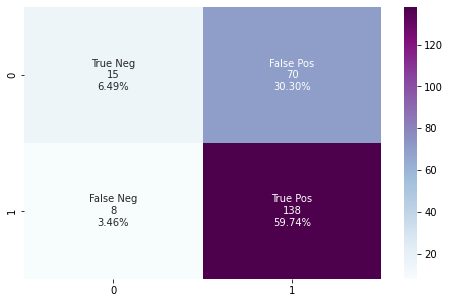

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
confusion_matrix_A = confusion_matrix(testOutput, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts1 = ["{0:0.0f}".format(value) for value in
                confusion_matrix_A.flatten()]
group_percentages1 = ["{0:.2%}".format(value) for value in
                     confusion_matrix_A.flatten()/np.sum(confusion_matrix_A)]
labels1 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts1,group_percentages1)]
labels1 = np.asarray(labels1).reshape(2,2)
plt.figure(figsize=(8,5))
ax = sns.heatmap(confusion_matrix_A, annot=labels1, fmt='', cmap='BuPu')

In [8]:
accuracy_score(testOutput, y_pred)

0.6623376623376623

In [9]:
y1 = classifier.predict(testInput[10:11])
y1 = y1*100
print("predicted chance of survival is",y1[0][0],"%")

predicted chance of survival is 89.93182 %
